# Import the required libraries

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

# read the data

In [2]:
df = pd.read_csv("exams.csv")

In [3]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group D,some high school,free/reduced,none,57,76,69
1,male,group D,high school,free/reduced,none,39,40,40
2,female,group C,some college,standard,none,66,67,66
3,female,group E,high school,standard,none,61,73,74
4,male,group A,some high school,standard,none,48,44,45


# check for null values

In [4]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

#### DataFrame haven't any missing(null) values

# minimum, maximum, mean, median, mode, standard deviation etc

In [7]:
df.describe()

,math score,reading score,writing score
count,1000.000000,1000.000000,1000.000000
mean,66.476000,69.584000,68.480000
std,15.249064,14.447688,15.228575
min,12.000000,15.000000,20.000000
25%,56.000000,60.000000,58.000000
50%,67.000000,70.000000,68.500000
75%,78.000000,80.000000,79.000000
max,100.000000,100.000000,100.000000


# total marks
-Total marks (for a student) = sum of the marks/scores in the 3 examinaion for a particular student.

-Percentage marks (for a student) = Total obtained marks divided by total marks, multiplied by 100.

In [8]:
df["Total marks"] = df["math score"] + df["reading score"] + df["writing score"]
df["Percentage"] = df["Total marks"] / 3
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total marks,Percentage
0,female,group D,some high school,free/reduced,none,57,76,69,202,67.333333
1,male,group D,high school,free/reduced,none,39,40,40,119,39.666667
2,female,group C,some college,standard,none,66,67,66,199,66.333333
3,female,group E,high school,standard,none,61,73,74,208,69.333333
4,male,group A,some high school,standard,none,48,44,45,137,45.666667


# assign grades to the marks

### Grading System:

Above 90 -> A

80 to 89 -> B

70 to 79 -> C

60 to 69 -> D

50 to 59 -> E

less than 50 -> F ( means Fail)

Considering 50 as pass marks

In [9]:
def Grade(marks):
    if marks >= 90:
        grade = 'A'
    elif marks >= 80:
        grade = 'B'
    elif marks >= 70:
        grade = 'C'
    elif marks >= 60:
        grade = 'D'
    elif marks >= 50:
        grade = 'E'
    else:
        grade = 'F'
    return grade
        
        
df["Grade_math"] = df["math score"].apply(lambda s: Grade(s))
df["Grade_reading"] = df["reading score"].apply(lambda s: Grade(s))
df["Grade_writing"] = df["writing score"].apply(lambda s: Grade(s))
df["Overall_grade"] = df["Percentage"].apply(lambda s: Grade(s))
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total marks,Percentage,Grade_math,Grade_reading,Grade_writing,Overall_grade
0,female,group D,some high school,free/reduced,none,57,76,69,202,67.333333,E,C,D,D
1,male,group D,high school,free/reduced,none,39,40,40,119,39.666667,F,F,F,F
2,female,group C,some college,standard,none,66,67,66,199,66.333333,D,D,D,D
3,female,group E,high school,standard,none,61,73,74,208,69.333333,D,C,C,D
4,male,group A,some high school,standard,none,48,44,45,137,45.666667,F,F,F,F


# visualizing the data

### Maths Score:

<Axes: xlabel='math score', ylabel='count'>

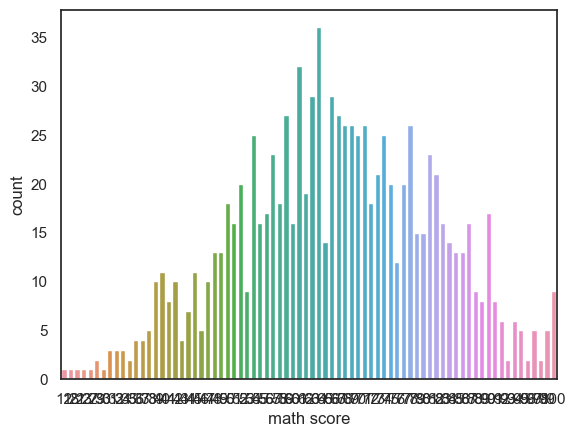

In [10]:
sns.set(style = "white")
sns.countplot(x = "math score", data = df)

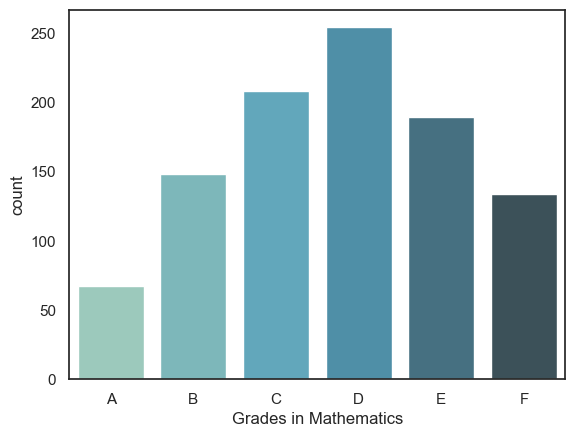

In [11]:
order_grade = ["A","B","C","D","E","F"]
sns.countplot(x = "Grade_math", data = df, order = order_grade, palette = "GnBu_d")
_ = plt.xlabel("Grades in Mathematics")

### Reading Score:

<Axes: xlabel='reading score', ylabel='count'>

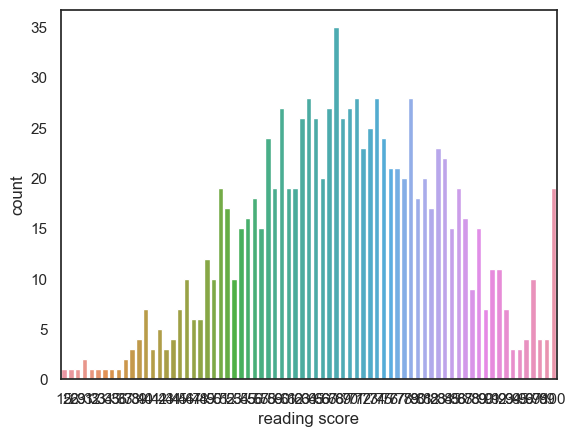

In [12]:
sns.countplot(x = "reading score", data = df)

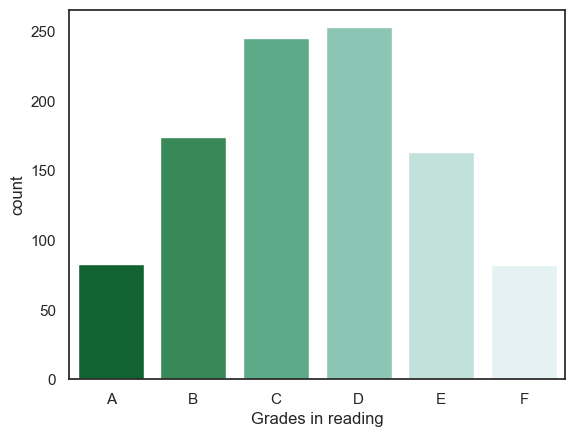

In [13]:
sns.countplot(x= "Grade_reading",data = df, order = order_grade, palette = "BuGn_r")
_ = plt.xlabel("Grades in reading")

### Writing Score:

<Axes: xlabel='writing score', ylabel='count'>

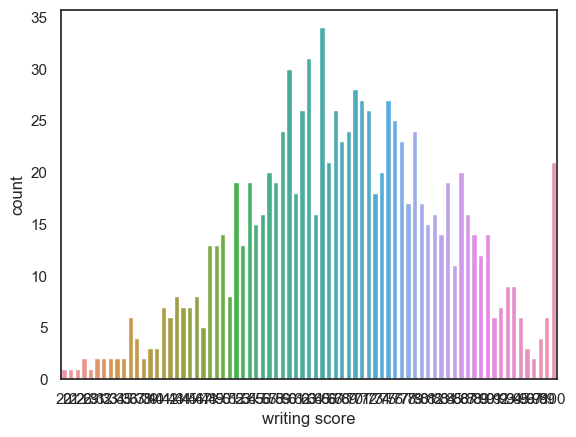

In [14]:
sns.countplot(x = "writing score", data = df)

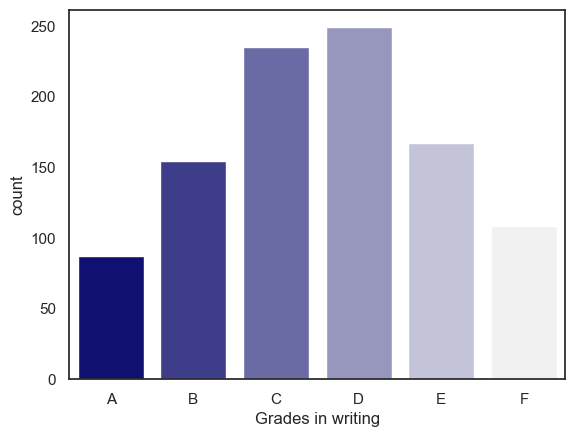

In [15]:
sns.countplot(x = "Grade_writing", data = df, order = order_grade, palette = sns.light_palette("navy", reverse=True))
_ = plt.xlabel("Grades in writing")

### Overall score